In [2]:
import dynamiqs as dq
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [65]:
#parameters
pi=jnp.pi
N=20 #Hilbert space dimension
n=2 #number Fock state
alpha=2 #coherent state amplitude
g2=1.0
k_b=10
e_d=-4

T      = 4.0      # total time
n_steps = 80      # number frame
tlist  = jnp.linspace(0, T, n_steps)


In [81]:
#operators and states
a=dq.destroy(N)
# I  = dq.eye(N)
# a_sys  = dq.tensor(a,  I)
# adag_sys = a_sys.dag()
# b_sys  = dq.tensor(I,  a)
# bdag_sys = b_sys.dag()

D = lambda alph: dq.expm(alph*a.dag() - alph.conjugate()*a)
P = dq.expm(1j*pi*a.dag()@a)

W_fromDP = lambda alph, rho: (2 / pi * dq.trace(D(alph) @ P @ D(alph).dag() @ rho)).item().real

/home/manman/.local/lib/python3.10/site-packages/equinox/_module.py:1041: UserWarning: A `SparseDIAQArray` has been converted to a `DenseQArray` while computing its matrix exponential.
  return self.__func__(self.__self__, *args, **kwargs)


In [74]:
P@dq.fock(N, 1)

QArray: shape=(20, 1), dims=(20,), dtype=complex64, layout=dense
[[ 0.       +0.0000000e+00j]
 [-1.0000002+4.1723257e-07j]
 [ 0.       +0.0000000e+00j]
 [ 0.       +0.0000000e+00j]
 [ 0.       +0.0000000e+00j]
 [ 0.       +0.0000000e+00j]
 [ 0.       +0.0000000e+00j]
 [ 0.       +0.0000000e+00j]
 [ 0.       +0.0000000e+00j]
 [ 0.       +0.0000000e+00j]
 [ 0.       +0.0000000e+00j]
 [ 0.       +0.0000000e+00j]
 [ 0.       +0.0000000e+00j]
 [ 0.       +0.0000000e+00j]
 [ 0.       +0.0000000e+00j]
 [ 0.       +0.0000000e+00j]
 [ 0.       +0.0000000e+00j]
 [ 0.       +0.0000000e+00j]
 [ 0.       +0.0000000e+00j]
 [ 0.       +0.0000000e+00j]]

In [28]:
alph = 1+1j
rho = dq.fock_dm(N, 1)

# foo = D(alph) @ P @ D(alph).dag() @ rho
foo = 2 / pi * dq.trace(D(alph) @ P @ D(alph).dag() @ rho)

/home/manman/.local/lib/python3.10/site-packages/equinox/_module.py:1041: UserWarning: A `SparseDIAQArray` has been converted to a `DenseQArray` while computing its matrix exponential.
  return self.__func__(self.__self__, *args, **kwargs)


In [44]:
# dq.to_numpy(foo)
# float(dq.to_numpy(foo))
foo.item().real

0.25843948125839233

/home/manman/.local/lib/python3.10/site-packages/equinox/_module.py:1041: UserWarning: A `SparseDIAQArray` has been converted to a `DenseQArray` while computing its matrix exponential.
  return self.__func__(self.__self__, *args, **kwargs)


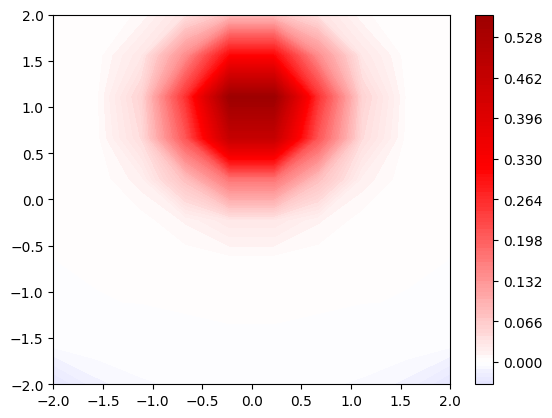

In [88]:
# some_state = dq.fock_dm(N, 1)
some_state = dq.coherent_dm(N, 1j)

nx, ny = 10, 10
xrange = (-2, 2)
yrange = (-2, 2)

xvals = np.linspace(xrange[0], xrange[1], nx)
yvals = np.linspace(yrange[0], yrange[1], ny)

wigner_values = np.zeros((nx,ny))

# xx, yy = np.meshgrid(xvals, yvals)

for xi, yi in np.ndindex((nx,ny)):
    xv, yv = xvals[xi], yvals[yi]
    wigner_values[xi, yi] = W_fromDP(xv+yv*1j, some_state)

plt.contourf(xvals, yvals, wigner_values.T, levels=100, cmap="seismic", vmin=-2/np.pi, vmax=2/np.pi)
plt.colorbar()


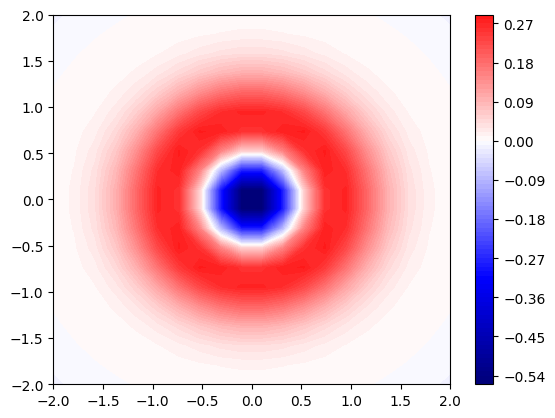

In [85]:
plt.contourf(xvals, yvals, wigner_values.T, levels=100, cmap="seismic", vmin=-2/np.pi, vmax=2/np.pi)
plt.colorbar()

# plt.imshow(wigner_values)

In [56]:
wigner_values

array([[ 2.68788784e+14,  5.90600405e+11,  9.39902208e+08,
         2.25296175e+06,  3.91139160e+03,  1.75070438e+01,
        -1.83090344e-01, -2.08113730e-01, -2.08148941e-01,
        -2.08148360e-01, -2.08148330e-01, -2.08148941e-01,
        -2.08074868e-01, -1.86898246e-01,  1.75070438e+01,
         5.21518896e+03,  1.75230350e+06,  7.69010880e+08,
         6.12474487e+11,  2.68788784e+14],
       [ 1.11995332e+14,  8.74963517e+10,  2.56336960e+08,
        -8.34430250e+05,  3.25949310e+02, -1.01859159e+01,
         3.26391965e-01,  3.08314115e-01,  3.08171839e-01,
         3.08174402e-01,  3.08174431e-01,  3.08171898e-01,
         3.08314115e-01,  3.22040081e-01, -9.54929638e+00,
         6.51898621e+02, -5.00658125e+05,  1.70891312e+08,
        -4.37481759e+10,  4.47981321e+13],
       [ 8.95962642e+13,  2.18740883e+11,  1.53802176e+09,
         6.67544188e+05,  0.00000000e+00,  8.91267681e+00,
        -6.46566898e-02, -6.51423931e-02, -6.50866926e-02,
        -6.50870651e-02, -6.5